<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/ML_5_short_essay_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short Essay Scoring
For these last session we are going to focus on scoring elementary reading comprehension exercices.

In [219]:
#First, let's import the nesseacary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1. Import the data and print some statistics 
more information about the data set can be found in:  https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [220]:
####################################################
#Data loading and basic modification
df = pd.read_csv("short_essay_scoring.csv")
df.drop(['Unnamed: 0'],inplace = True,axis = 1)
df['score'] = df['score']
print ('the data frame has a shape :', df.shape)
df.head(30)

the data frame has a shape : (1500, 5)


,answer,question_text,text_id,grade,score
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3
5,I wuld rather be friends with the last charact...,Would you rather be friends with the main char...,BASEMzne0vBjgFUM6niwywRV5g,3,9
6,Tracking sunspots and predicting solar storms ...,Flip through the part of the text you have rea...,BASENMSJzWLV07CKMlT7yr2vPA,7,7
7,I rather be friends with the main character be...,Would you rather be friends with the main char...,BASE1sursGwC9Gcmr64d_7Z77A,4,7
8,He never gave up when he was turned into a mou...,"The boy is never given a name in the story, ye...",BASEkAITp4dIe3STuqsJ7CGKUw,2,9
9,His friend and copying each other and going t...,What does the main character or person really ...,BASEAM1_r5k4MpfL2PfLuQxruQ,2,9


## 2. A little bit about processing text data (NLP)
https://www.nltk.org

In [221]:
#we are going to use nltk sentence tokenizer, word tokenizer, pos tagger, lemmatizer, ngrams

In [222]:
# Explanation of the usefulness of tokenizer. 
sentence = 'This is a great sentence because i wrote it. We\'ll see how this goes. Harry Potter said "I love Quiddich."'
print(sentence.split(" "))
tokens = word_tokenize(sentence)
print(tokens)
print(len(tokens))

['This', 'is', 'a', 'great', 'sentence', 'because', 'i', 'wrote', 'it.', "We'll", 'see', 'how', 'this', 'goes.', 'Harry', 'Potter', 'said', '"I', 'love', 'Quiddich."']
['This', 'is', 'a', 'great', 'sentence', 'because', 'i', 'wrote', 'it', '.', 'We', "'ll", 'see', 'how', 'this', 'goes', '.', 'Harry', 'Potter', 'said', '``', 'I', 'love', 'Quiddich', '.', "''"]
26


In [223]:
# SENT TOKENIZER
from nltk.tokenize import sent_tokenize
sents = sent_tokenize('This is a great sentence because i wrote it. We\'ll see how this goes. Harry Potter said "I love Quiddich."')
sents
print(sents)

['This is a great sentence because i wrote it.', "We'll see how this goes.", 'Harry Potter said "I love Quiddich."']


In [224]:
# PART OF SPEECH TAGGING
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('sentence', 'NN'),
 ('because', 'IN'),
 ('i', 'NN'),
 ('wrote', 'VBD'),
 ('it', 'PRP'),
 ('.', '.'),
 ('We', 'PRP'),
 ("'ll", 'MD'),
 ('see', 'VB'),
 ('how', 'WRB'),
 ('this', 'DT'),
 ('goes', 'VBZ'),
 ('.', '.'),
 ('Harry', 'NNP'),
 ('Potter', 'NNP'),
 ('said', 'VBD'),
 ('``', '``'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('Quiddich', 'NNP'),
 ('.', '.'),
 ("''", "''")]

In [225]:
# STOPWORDS
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [226]:
# NGRAMS
from nltk import ngrams
#n for number
#g for group of words 
#unigram 1 word bigram 2 word etc...
n = 5
question = " Who is the main character?"
answer = "The main character is Harry Potter"

question_gram = ngrams( word_tokenize(question), n)
answer_gram = ngrams( word_tokenize(answer), n)

print(list(question_gram))
print(list(answer_gram))

[('Who', 'is', 'the', 'main', 'character'), ('is', 'the', 'main', 'character', '?')]
[('The', 'main', 'character', 'is', 'Harry'), ('main', 'character', 'is', 'Harry', 'Potter')]


In [227]:
# TFIDF 
#it's a way to mesure word rarity within a context
# term frequency / document frequency
#term frequency the amount of time a word appear in a sentence
# DOcument frequency : amount of document that have the word
from sklearn.feature_extraction.text import TfidfVectorizer

      

## 3. Looking at length
Here we are going to create a new feature called length and visualize it's relationship with our target

In [228]:
df['length'] = [len(answer) for answer in df.answer]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Char Length vs. Score')

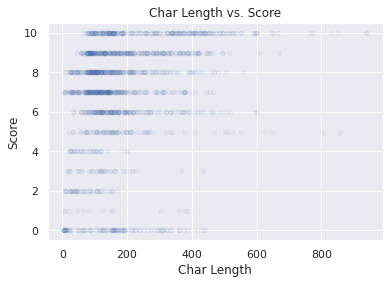

In [229]:
fig = plt.figure(figsize=(6, 4))
fig.clf()
ax = fig.gca()
df.plot(kind = 'scatter', x = 'length', y = 'score', ax = ax, alpha = 0.05)
ax.set_xlabel('Char Length')
ax.set_ylabel('Score')
ax.set_title('Char Length vs. Score')

In [230]:
from sklearn.model_selection import train_test_split
# your code here
X_train, X_test, y_train, y_test = train_test_split(np.array(df['length']).reshape(-1,1), df["score"], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (1050, 1) (1050,)
test shape (450, 1) (450,)


In [231]:
print(np.array(df['length']).reshape(-1,1))

[[103]
 [215]
 [149]
 ...
 [ 66]
 [107]
 [ 84]]


In [232]:
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print  ('train score =' , train_score)
print  ('test score = {}'.format(test_score))
print ('mse = {}'.format(mean_squared_error(predictions, y_test)))
print('mae = {}'.format(mean_absolute_error(predictions, y_test)))

train score = 0.0750142588037207
test score = 0.013233546425281517
mse = 6.820749008542582
mae = 2.029492690556743


## 4. Feature Engineering for linear regression
Create at least 3 different features

In [233]:
from nltk import *
import string
#############################
#data pre processing, we will 
df["normalized"] = ""
#############################
#we are using answer everywhere let's normalize answer
#we will withdraw punctuation and lower ever word. We could use stemming but we wont for now.
for i in range(1500):
  df.normalized[i] = df.answer[i].lower().translate(str.maketrans('', '', string.punctuation))
#tokens = [normal_answer.lower() for token in normal_answer]


In [234]:
## USAGE OF TDFI FEATURES 
#let's take the mean of the tf idf for each answer so we will have a feature giving us an overall idea of the richness of the children vocabulary
from sklearn.model_selection import train_test_split

answer_vectorizer = TfidfVectorizer(stop_words="english")
X1 =answer_vectorizer.fit_transform(df['normalized'])
y = df["score"]

plop = []
for r in range(len(df.normalized)):
  #print("ROW " + str(r) + " - " + df.normalized[r])
  x = 0
  y = 0
  for z in zip(answer_vectorizer.get_feature_names(), X1[r,:].toarray()[0]):
    if z[1] > 0:
      x += z[1]
      y += 1
      #print(z[1])  
    else:
      y=1  
  plop.append(x/y)  

df['word_rarity'] = plop

In [235]:
############################################################
#After looking the data i found that lenght alone was not enough, because the younger ones write less words but still deserve a good grade
#let's correlate the number of word per answer with the grade as a first feature, 
# we added a +2 to grade because of grade 0 and -1 which create some division by 0 

df['wordcount'] = [len(word_tokenize(answer)) for answer in df.normalized]
df['wordcountovergrade'] = df['wordcount']/(df['grade']+2)

In [236]:
#a big thank you for my classmate nassim
#having huge trouble while trying to install librairy like Pyechant or other spellcheck one, i just settled for the same method as him
#but we undestood the underlying logic before using it


In [237]:
!pip install --upgrade language_tool_python

Requirement already up-to-date: language_tool_python in /usr/local/lib/python3.6/dist-packages (2.5.2)


In [238]:
#will take you ages ( approximatively 5-6 full minute) ( i found more efficient way but could not get them to work with my IDE)
import language_tool_python
errorcheck = language_tool_python.LanguageTool('en-US')
df["error_num"] = ""
for k in range(df.shape[0]):
  df.error_num[k] = len(errorcheck.check(df['normalized'].loc[k]))/len(word_tokenize(df['normalized'].loc[k]))


In [239]:
df.head()

,answer,question_text,text_id,grade,score,length,normalized,word_rarity,wordcount,wordcountovergrade,error_num
0,Destiny would be a good friend beacu like to r...,Would you enjoy being friends with the main ch...,AUTJfAnEIe5XGTq1jvkynEr-Q,3,7,103,destiny would be a good friend beacu like to r...,2.378056,21,4.200000,0.190476
1,I think Mr.Popper would disagree because he wa...,Which character do you think would disagree wi...,BASEvlmqaEWAE9oL3mOT2KG9JQ,3,9,215,i think mrpopper would disagree because he was...,3.805589,41,8.200000,0.121951
2,i think that it has made me a better person be...,Do you think reading this text has made you a ...,BASEAOH8j3w9WsZOxNQ9dzAUFQ,5,8,149,i think that it has made me a better person be...,2.937624,31,4.428571,0.0645161
3,A part that I could not stop reading was when ...,Tell us about one part of this book that total...,AUToHuz362h0RJY-hPa7O6MDw,3,9,146,a part that i could not stop reading was when ...,2.758104,29,5.800000,0.103448
4,its not as good as the any of the other ones,Does this book remind you of the last book you...,BASEasfHPZhAW77njjMyzqLqOw,1,3,44,its not as good as the any of the other ones,1.373612,11,3.666667,0.0909091


## 5. Visualize the data
Create at least 3 graphs visualizing your features with respect to the target

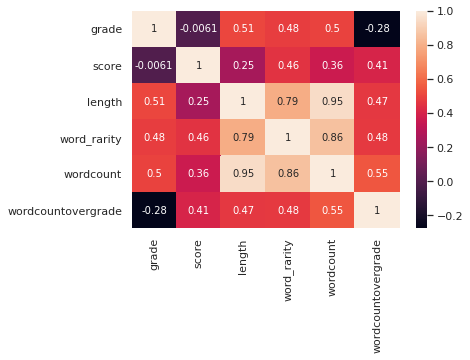

In [240]:

# The correlation matrix will show the correlation
# i used seaborn to print the coorelation matrix as i found it to be easy to read.
import seaborn as sns
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

score = 6.930666666666666


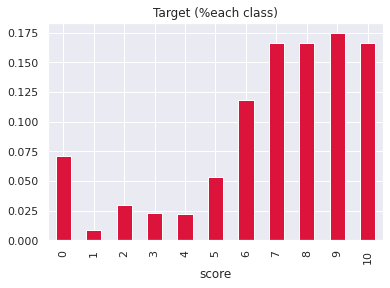

In [241]:
## YOUR CODE HERE
# let's reuse our barplot function from last assignement 
%matplotlib inline
import matplotlib.pyplot as plt
print ('score =', df['score'].mean())
(df.groupby('score').size()/df.shape[0]).plot(kind="bar",title="Target (%each class)", color = "crimson")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

'Done'

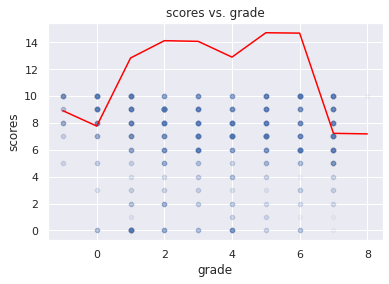

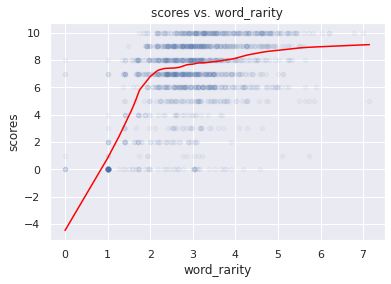

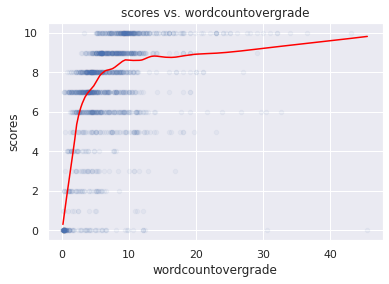

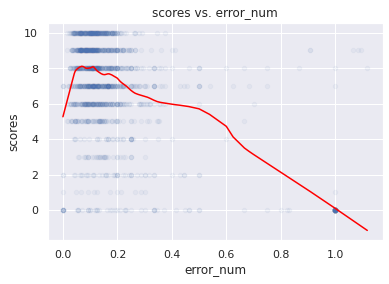

In [242]:
## YOUR CODE HERE
# imported from our great course on bike 
%matplotlib inline   

def score_scatter(df, cols):
    import matplotlib.pyplot as plt
    import statsmodels.nonparametric.smoothers_lowess as lw
    
    ## Loop over the columns and create the scatter plots
    for col in cols:
        ## first compute a lowess fit to the data
        los = lw.lowess(df['score'], df[col], frac = 0.3)
    
        ## Now make the plots
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df.plot(kind = 'scatter', x = col, y = 'score', ax = ax, alpha = 0.05)
        plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
        ax.set_xlabel(col)
        ax.set_ylabel('scores')
        ax.set_title('scores vs. ' + col)    
    return 'Done'

num_cols = ["grade", "word_rarity", "wordcountovergrade", "error_num"]
score_scatter(df, num_cols)

'Done'

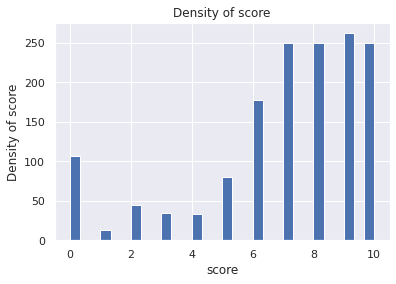

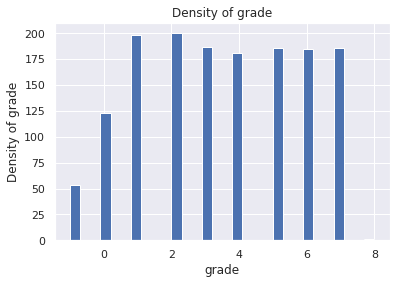

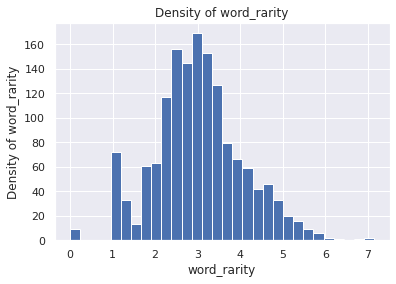

In [243]:
def score_hist(df, cols):    
    import matplotlib.pyplot as plt
    
    ## Loop over columns and plot histograms
    for col in cols:
        fig = plt.figure(figsize=(6, 4))
        fig.clf()
        ax = fig.gca()
        df[col].hist(bins = 30, ax = ax)
        ax.set_xlabel(col)
        ax.set_ylabel('Density of ' + col)
        ax.set_title('Density of ' + col) 
    
    return 'Done'
hist_cols = ["score","grade", "word_rarity"]
score_hist(df, hist_cols)

## 6. Model Training
Pick a model, fit your features and print performance metrics

In [244]:
## YOUR CODE HERE FOR MODEL TRAINING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df.score
X = df[['word_rarity', 'wordcountovergrade','error_num']]
X_train,X_test ,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =125)

clf = LinearRegression()
#Fit the model according to the given training data. 
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)




In [245]:
## YOUR CODE HERE FOR PRINTING PERFORMANCES
print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)
train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)
 
print ('mse = {}'.format(mean_squared_error(y_pred, y_test)))
print('mae = {}'.format(mean_absolute_error(y_pred, y_test)))

train shape (1050, 3) (1050,)
test shape (450, 3) (450,)
train accuracy = 0.3331331900480149
test accuracy = 0.34235731533030467
mse = 5.1320941207252915
mae = 1.7504025407001906


## 7. RESULT INTERPRETATION
Look at parameters, print or visualize predictions

In [246]:
########################################################################
#we took the mean of the tf idf for each answer so we will have a feature giving us an overall idea of the richness of the children vocabulary
# looking at the correlation matrix and the graph we can see that this is the most meaningfull feature we have as it is well correlated with the score
#which is understandable as the vocabulary of a children is a clear sign of his of his overall grade

In [247]:
#######################################################################
# wordcountovergrade was used as we wanted to have an idea of the lenght of the copy but still thinking about the grade and the fact
#that a younger children would write less than an older one



In [248]:
#######################################################################
# the amount of mistake one make is a relatively good way to assess one's mastery of a language.
#the problem with the low correlation of this feature is that it may not be precise enough because of our too simplistic implementation.
# But the idea really seem good

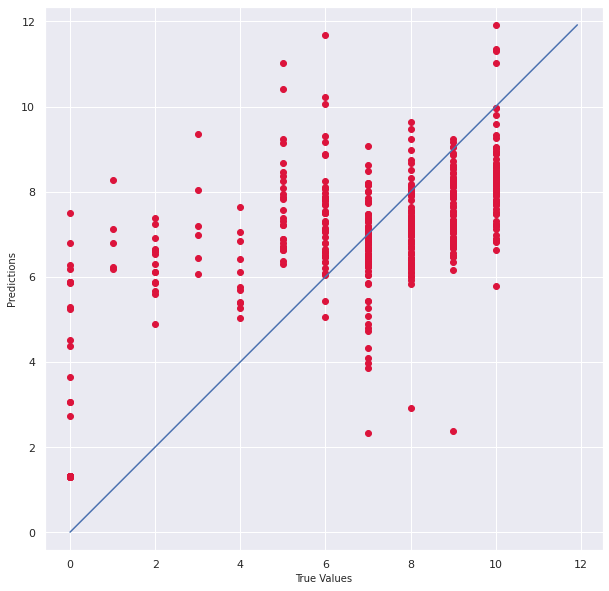

In [249]:
#visualisation of our linear regression:
#Generated Predictions

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()


## 8. Second interation improvement


In [250]:
## NEW FEATURE ENGINEERING

# i wanted to try feature that try to assess the context of a word in a sentence and other more complexe idea
# about measuring the meaning of a text.

# If we look at the way we approached this data, we can see we measured the correctness of the language and not the 
# idea and meaning of the text compared to the question

# This speaks a lot about the innacurracy of our system and show that our data is not enough for multiple reason:

# 1) The grade: we dont have enough answer per grade. Each grade represent a whole other way of score assessment as we ask
# very specific thing related to the age of a student
# example: we may be focused on the accuracy of the syntax for younger student and more the meaning for older ones.

# 2) The answer, book and lack of context:
#we have relatively few way of assessing the correlation between the question and answer with our dataset even though
# it seem possible and we will try inmplementing such a feature in our spare time ( n-gram for example)
# We need more information about the book read by the student, at least keyword to describe it because every answer seem to be related to the book
# making the question feature incomplete because the answer depend on the book.

# The last point i wanted to make is the fact that we learn that data science need algorithm as much as a deep understanding of data
# because meaningless good result are not exploitable 






In [251]:
## NEW MODEL TRAINING

#let's try our simple feature using logistic regression this time


# same as before 

loglog = LogisticRegression(random_state=14)
# your code here

loglog.fit(X_train,y_train) #Fit the model according to the given training data. (doc )
train_score = loglog.score(X_train,y_train)
test_score = loglog.score(X_test,y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

from sklearn.metrics import confusion_matrix
y_pred = loglog.predict(X_test)

absolute_confusion = confusion_matrix(y_test, y_pred)
print("confusion matrix")
print(absolute_confusion)

print("valscore")
scores1 = cross_val_score(loglog, X, y, scoring='accuracy') 
print (scores1)
print ('scores mean =', scores1.mean(), 'scores std =', scores1.std())

train accuracy = 0.3304761904761905
test accuracy = 0.31333333333333335
confusion matrix
[[23  0  1  0  0  0  0  7  0  1  0]
 [ 0  0  0  0  0  0  0  4  0  0  1]
 [ 0  0  0  0  0  0  0 10  5  1  0]
 [ 0  0  0  0  0  0  0  3  1  0  2]
 [ 0  0  0  0  0  0  0 10  0  1  0]
 [ 0  0  0  0  0  0  0  9  1  7 10]
 [ 0  0  0  0  0  0  0 19  1 10 14]
 [ 4  0  0  0  0  0  0 44 12 12 10]
 [ 1  0  0  0  0  0  0 38  8 16 16]
 [ 1  0  0  0  0  0  0 13 15 21 28]
 [ 0  0  0  0  0  0  0  3  6 16 45]]
valscore
[0.36       0.35333333 0.28666667 0.33333333 0.29333333]
scores mean = 0.3253333333333333 scores std = 0.030228757463345683


In [255]:
## NEW PERFORMANCE ASSESMENT

# let's try the SGD

laglag = SGDClassifier(random_state=14, alpha = "learning_rate")
# your code here

laglag.fit(X_train,y_train) #Fit the model according to the given training data. (doc )
train_score = loglog.score(X_train,y_train)
test_score = loglog.score(X_test,y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)
y_pred = laglag.predict(X_test)

absolute_confusion = confusion_matrix(y_test, y_pred)
print("the result are worse than with simple logistic regression")

print("confusion matrix")
print(absolute_confusion)
print("valscore")
scores2 = cross_val_score(laglag, X, y, scoring='accuracy') 
print (scores2)
print ('scores mean =', scores2.mean(), 'scores std =', scores2.std())

TypeError: ignored

In [215]:

from sklearn.ensemble import RandomForestClassifier
forfor = RandomForestClassifier(random_state=112,n_estimators=2, max_depth=1, min_samples_leaf=1000000,  min_samples_split = 11)
forfor.fit(X,y)
scores_rf = cross_val_score(forfor, X, y, scoring='accuracy', cv=5)
print(scores_rf)
print('cross validation accuracy =', scores_rf.mean())

[0.16666667 0.16666667 0.17333333 0.17333333 0.17666667]
cross validation accuracy = 0.1713333333333333


In [216]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':[1, 4, 7],'min_samples_split':[2, 4, 6, 8, 10],
          'n_estimators':[20, 30, 40], 'max_depth': [2,3]}
randfor = RandomForestClassifier(random_state=1)
bestforfor = GridSearchCV(randfor, params, scoring = 'accuracy',cv=5)
bestforfor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [217]:
#
print(bestforfor.best_score_, "best score")
print(bestforfor.best_params_, "best_score")

0.35133333333333333 best score
{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20} best_score


In [256]:
## NEW PERFORMANCE ASSESMENT


# The result for the logistic regression are suspiciously similar to our linear regression result, but we still have slightly  better 
#result with logistic regression.  We should try and implement specific features for logistic regression to see if it allow for a better classification.

# The sgd classifier is worse than the others probably because of the way it is implemented 
# sklearn doc:  the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
#so maybe the structure of our data is not good for the Stochastic gradient descent. We haveto study that further.


#the random forest was really bad until trained with the sdg which gave us really good result considering the feature we have.
# we have trouble understanding why the random forest work with our data considered the huge amount of continuous feature we fed it. 


#########################################
print("good old linear regression result")
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)
 

print("##############################")
print("logistic regression result")

print("valscore")
scores1 = cross_val_score(loglog, X, y, scoring='accuracy') 
print (scores1)
print ('scores mean =', scores1.mean(), 'scores std =', scores1.std())
print("##############################")

print("SGC result")

print("valscore")
scores2 = cross_val_score(laglag, X, y, scoring='accuracy') 
print (scores2)
print ('scores mean =', scores2.mean(), 'scores std =', scores2.std())


print(scores_rf)
print('cross validation accuracy =', scores_rf.mean())

print("##############################")
print("optimised with grid search random tree result")

print(bestforfor.best_score_, "best score")
print(bestforfor.best_params_, "best_score")


good old linear regression result
train accuracy = 0.3304761904761905
test accuracy = 0.31333333333333335
##############################
logistic regression result
valscore
[0.36       0.35333333 0.28666667 0.33333333 0.29333333]
scores mean = 0.3253333333333333 scores std = 0.030228757463345683
##############################
SGC result
valscore
[0.15333333 0.18666667 0.20333333 0.19666667 0.23      ]
scores mean = 0.194 scores std = 0.02489087293679263
[0.16666667 0.16666667 0.17333333 0.17333333 0.17666667]
cross validation accuracy = 0.1713333333333333
##############################
optimised with grid search random tree result
0.35133333333333333 best score
{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20} best_score


In [ ]:
#We still need to try other feature based on ngram or Bag of word or even word vector to improve our modele, and maybe try with a neural network to see the result.
#It was a good exercice that helped us have an interresting introduction to language processing.